In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report


In [2]:
 %matplotlib inline

In [3]:
#importing required libraries


import seaborn as sns
%matplotlib notebook
from sklearn.preprocessing import LabelEncoder
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn import metrics


In [4]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [39]:
#reading the final_gene_list and then cluster them


df_gene = pd.read_csv('NLM_Genes10.csv')

In [40]:
df_gene.shape

(6803, 979)

In [41]:
df_gene.head()

,Unnamed: 0,X205642_at,X204589_at,X206674_at,X203495_at,X203776_at,X201787_at,X217622_at,X204366_s_at,X204910_s_at,...,X219994_at,X208714_at,X200826_at,X214262_at,X215738_at,X219149_x_at,X214235_at,X201284_s_at,X215449_at,X218110_at
0,0,6.1599,7.4389,5.4475,4.7503,7.6130,5.8423,5.8552,10.3411,5.0056,...,4.3443,10.2535,13.8609,5.2258,4.4446,6.4310,5.7174,8.1645,4.2134,6.0886
1,1,6.3579,7.2148,6.0864,5.2657,7.4464,4.1171,6.2185,10.4828,4.5497,...,5.0554,10.3365,13.4416,5.3701,5.6214,6.8771,4.9556,8.5785,4.1905,6.4301
2,2,6.0881,8.0539,5.5758,5.7639,7.5275,5.7611,5.9376,10.1599,4.1296,...,4.7817,10.2425,13.8498,4.4356,5.1700,6.7647,5.5902,8.5998,4.2387,5.9879
3,3,5.7578,7.6111,4.8790,4.6142,7.5856,4.1187,5.5596,10.5603,4.8927,...,4.4095,10.5148,13.8887,4.6032,5.3877,6.8166,5.4101,8.5041,4.2903,6.6305
4,4,6.0773,7.5039,5.8254,4.4802,7.5742,5.7275,5.5676,10.3644,4.6611,...,5.3738,10.5847,13.8942,5.6977,4.5193,6.5992,5.7497,8.2579,4.2433,5.9615


In [8]:
nlm_df=df_gene.iloc[:-1,1:]

In [9]:
nlm_df.head()

,X207339_s_at,X203028_s_at,X207462_at,X207738_s_at,X203536_s_at,X201385_at,X213971_s_at,X208281_x_at,X212020_s_at,X210364_at,...,X214125_s_at,X218055_s_at,X206012_at,X202554_s_at,X210136_at,X216102_at,X201838_s_at,X216728_at,X213883_s_at,X201581_at
0,4.1529,11.5215,4.5733,11.5458,9.3724,13.2225,7.5368,4.8862,7.5190,4.1727,...,5.0628,8.1203,5.5247,13.0095,6.9876,4.3568,6.1605,4.5084,8.3924,8.1901
1,4.9949,11.2390,5.5909,12.0261,9.4778,13.1049,7.2373,5.0302,7.8599,4.1635,...,4.6962,8.0526,4.3025,13.2136,6.6586,4.3613,5.9973,5.4941,8.3413,7.9180
2,5.5788,11.8220,4.9594,11.4555,9.5030,13.1435,7.5039,4.6138,7.6832,4.4712,...,4.2155,8.0479,5.2383,13.4465,7.1017,4.2525,6.1753,4.6186,8.3060,8.0061
3,5.4262,12.0571,5.2550,12.0364,9.1164,13.3459,7.4540,5.2420,7.9052,4.7562,...,4.2563,8.1120,4.5692,13.1652,6.9411,4.3138,6.0074,5.2914,8.9891,8.3202
4,4.1590,12.0131,4.1605,11.4654,9.5951,13.2180,7.3965,4.7336,7.6418,4.5635,...,4.2191,8.1650,4.1436,13.5461,6.9024,4.2574,6.0481,4.2732,8.5523,8.1833


In [10]:
df_unscaled=nlm_df.T

In [11]:
df_unscaled.head()

,0,1,2,3,4,5,6,7,8,9,...,6793,6794,6795,6796,6797,6798,6799,6800,6801,6802
X207339_s_at,4.1529,4.9949,5.5788,5.4262,4.1590,5.1185,4.1631,4.8380,4.1764,4.5413,...,6.3736,5.4169,4.7791,4.9929,5.5707,6.2804,5.4276,4.1585,6.6370,8.0871
X203028_s_at,11.5215,11.2390,11.8220,12.0571,12.0131,12.1809,10.8216,11.3316,11.1454,11.8529,...,7.0277,7.9723,7.2049,6.7948,8.0582,6.6345,8.3565,6.2609,6.3358,11.4515
X207462_at,4.5733,5.5909,4.9594,5.2550,4.1605,4.5681,4.5716,4.6851,4.8042,4.3265,...,5.3386,5.3088,4.7459,5.3657,7.2709,5.9495,4.3166,6.4680,4.9543,5.9444
X207738_s_at,11.5458,12.0261,11.4555,12.0364,11.4654,11.6991,11.8410,12.0312,12.2086,7.9858,...,11.8481,11.7395,11.8035,10.7670,10.7913,11.1185,9.9612,10.9858,10.7530,5.6939
X203536_s_at,9.3724,9.4778,9.5030,9.1164,9.5951,9.3294,9.8099,9.1457,8.6669,9.7867,...,9.3840,9.1839,8.8258,8.8795,9.1779,9.6306,9.1443,9.7432,7.5439,8.8899


In [12]:
#Scaling the data
from sklearn.preprocessing import StandardScaler

scaler =StandardScaler()
df=scaler.fit_transform(df_unscaled)

In [13]:
from sklearn.cluster import KMeans

In [14]:
#calculating sse for various values of n_clusters
num_clusters=range(1,12)
sse=[]
for k in num_clusters:
    kmodel= KMeans(n_clusters=k)
    kmodel.fit(df)
    sse.append(kmodel.inertia_)

sse

[6653333.999999998,
 2871052.684814753,
 1847353.410804559,
 1469394.7038748662,
 1289100.7656498118,
 1199229.3328444124,
 1152600.7281210874,
 1106221.7602141781,
 1083800.180319795,
 1043658.396597032,
 1014248.0907089043]

<IPython.core.display.Javascript object>


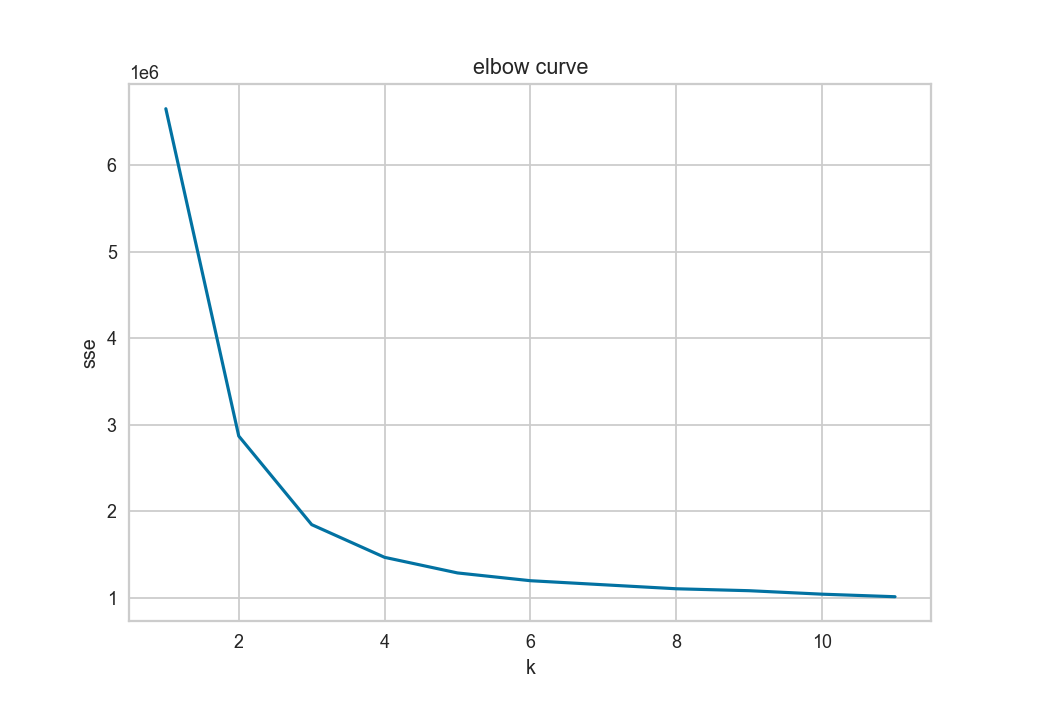

In [23]:
#plotting the elbow curve
plt.figure()
plt.xlabel('k')
plt.ylabel('sse')
plt.plot(num_clusters,sse)
plt.title('elbow curve')
plt.show()

In [24]:
#building kmeans model with  clusters (based on the elbow curve, n_clusters is chosen )
kmeans = KMeans(n_clusters=3, random_state=10).fit(df)

In [25]:
#cluster centroids
#kmeans.cluster_centers_

In [26]:
#predicting with the kmeans clustering model
clusters=kmeans.predict(df) #cluster labels (kmeans.labels_)


In [27]:
#silhoutte score for the model built
metrics.silhouette_score(df, clusters, metric = 'euclidean')

0.44180044587989165

In [28]:
#validating n_clusters using silhoutte score
s = []
nclusters = range(2, 13) #nclusters must be > 1
for n in nclusters:
    y_pred_temp = KMeans(n_clusters = n).fit_predict(df)  
    score = metrics.silhouette_score(df, y_pred_temp,metric = 'euclidean')
    s.append((n, score))
s

[(2, 0.5160760634590963),
 (3, 0.44180044587989165),
 (4, 0.37944873921033984),
 (5, 0.2853178052675608),
 (6, 0.26111763520393594),
 (7, 0.2611540303013072),
 (8, 0.18545785030271883),
 (9, 0.1775074323433447),
 (10, 0.17690604876344468),
 (11, 0.17391068349965663),
 (12, 0.1470842787796283)]

In [29]:
#!'/Library/Developer/CommandLineTools/usr/bin/python3' -m pip install yellowbrick

<IPython.core.display.Javascript object>


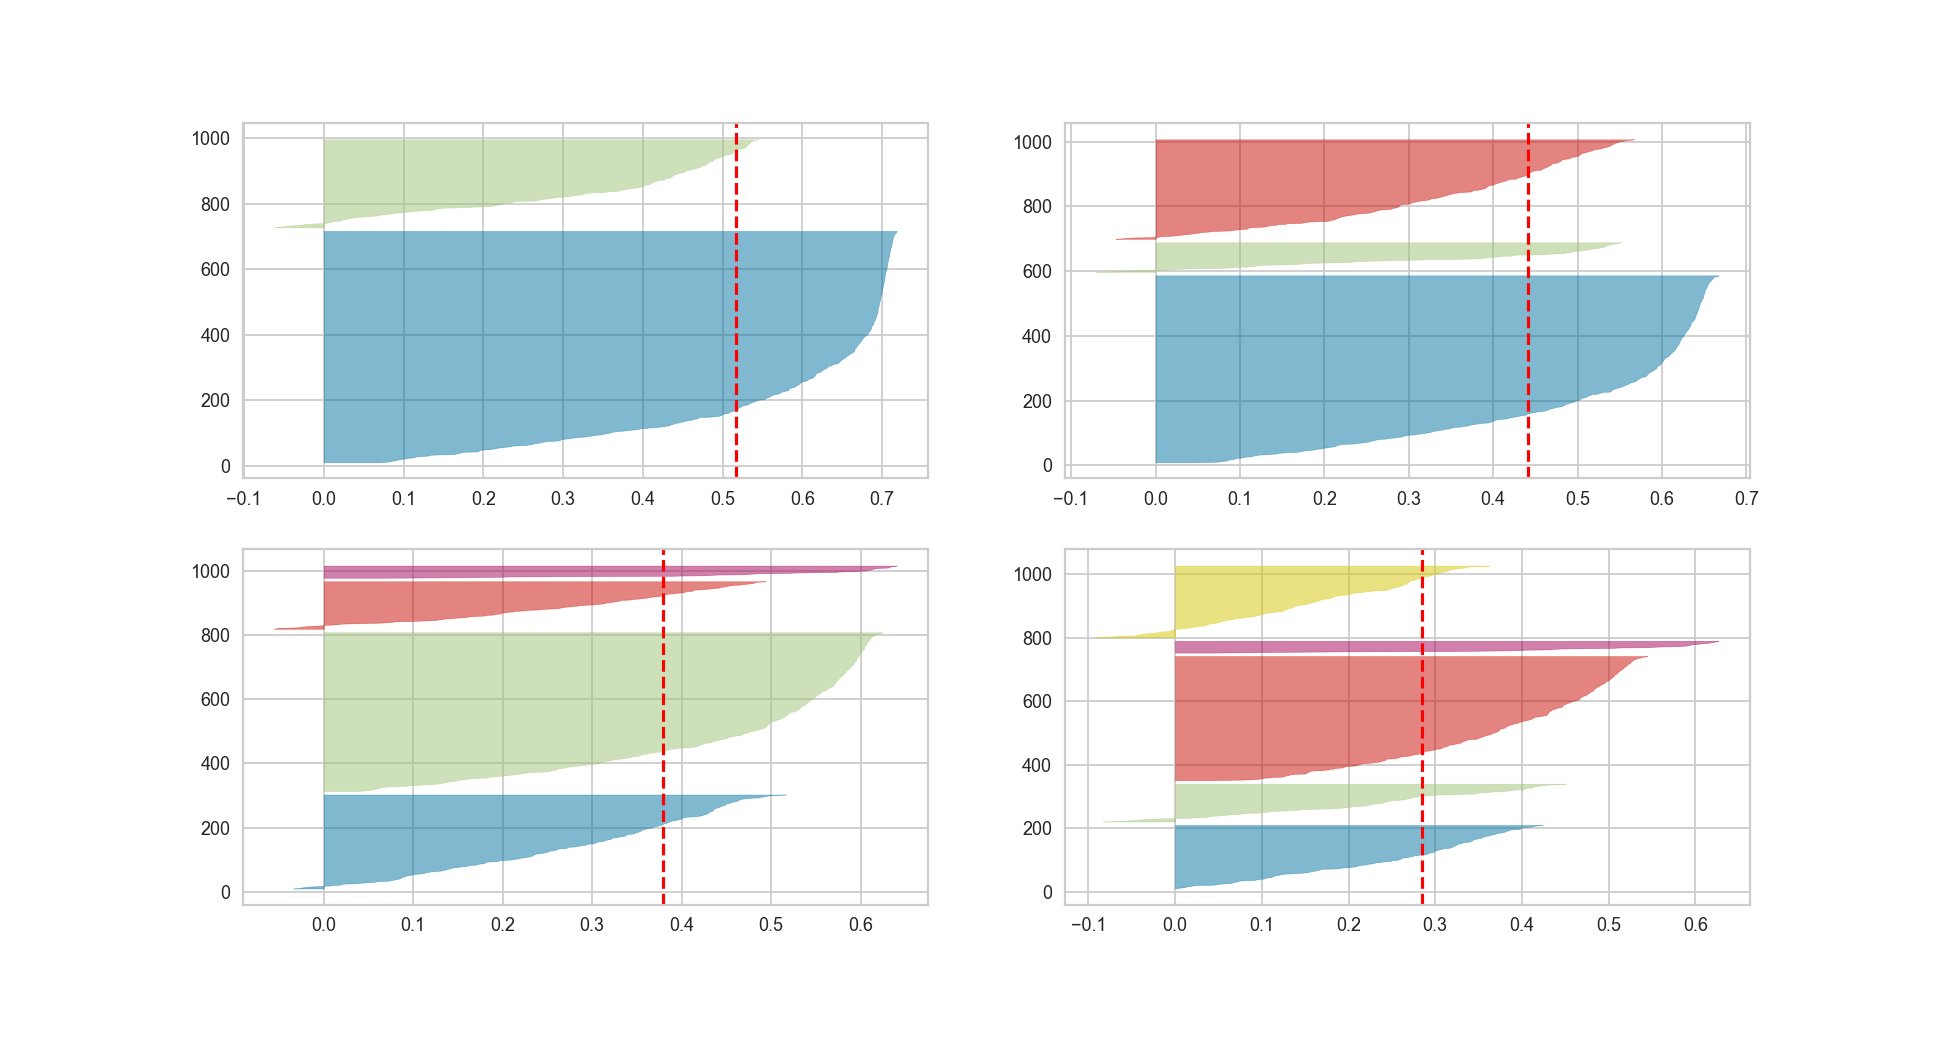

In [30]:
#Visualizing Silhouette score for n_clusters 2,3,4,5
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df)

Here is the Silhouette analysis done on the above plots to select an optimal value for n_clusters.

The value of n_clusters as 5 looks to be suboptimal for the given data due to the following reasons:
    Presence of clusters with below-average silhouette scores 
    Wide fluctuations in the size of the silhouette plots.
The value of 3 and 4 for n_clusters looks to be the optimal one. The silhouette score for each cluster is above average silhouette scores. Thus, the optimal number of clusters is chosen as 3.

In [31]:
pd.options.mode.chained_assignment = None #default=warn

In [32]:
#test set silhouette_score
#metrics.silhouette_score(X, y_pred, metric = 'euclidean')

In [33]:
kmeans.inertia_ #The lower values of inertia are better and zero is optimal.

1847353.410804559

In [47]:
#calculating mean expression for each gene
#df_unscaled['mean_exp'] = df_unscaled.mean(axis=1)

In [36]:
# dict to store clusters data
cluster_dict=[]
for c in clusters:
    cluster_dict.append(c)


# adds the cluster information as a column in the df
df_unscaled['cluster'] = cluster_dict

# saves the df as a .xlsx
#df_unscaled.to_excel("4_clusters_k_means.xlsx")

In [37]:
df_unscaled.head()

,0,1,2,3,4,5,6,7,8,9,...,6794,6795,6796,6797,6798,6799,6800,6801,6802,cluster
X207339_s_at,4.1529,4.9949,5.5788,5.4262,4.1590,5.1185,4.1631,4.8380,4.1764,4.5413,...,5.4169,4.7791,4.9929,5.5707,6.2804,5.4276,4.1585,6.6370,8.0871,1
X203028_s_at,11.5215,11.2390,11.8220,12.0571,12.0131,12.1809,10.8216,11.3316,11.1454,11.8529,...,7.9723,7.2049,6.7948,8.0582,6.6345,8.3565,6.2609,6.3358,11.4515,2
X207462_at,4.5733,5.5909,4.9594,5.2550,4.1605,4.5681,4.5716,4.6851,4.8042,4.3265,...,5.3088,4.7459,5.3657,7.2709,5.9495,4.3166,6.4680,4.9543,5.9444,1
X207738_s_at,11.5458,12.0261,11.4555,12.0364,11.4654,11.6991,11.8410,12.0312,12.2086,7.9858,...,11.7395,11.8035,10.7670,10.7913,11.1185,9.9612,10.9858,10.7530,5.6939,0
X203536_s_at,9.3724,9.4778,9.5030,9.1164,9.5951,9.3294,9.8099,9.1457,8.6669,9.7867,...,9.1839,8.8258,8.8795,9.1779,9.6306,9.1443,9.7432,7.5439,8.8899,2


In [38]:
#cluster sizes
df_unscaled['cluster'].value_counts()

1    578
2    308
0     92
Name: cluster, dtype: int64

In [51]:
cluster1=df_unscaled[df_unscaled.cluster==0]

cluster2=df_unscaled[df_unscaled.cluster==1]

cluster3=df_unscaled[df_unscaled.cluster==2]

#cluster4=df_unscaled[df_unscaled.cluster==3]

#cluster5=df_unscaled[df_unscaled.cluster==4]
#
#cluster1.to_csv('cluster1.csv',index=False)
#cluster2.to_csv('cluster2.csv',index=False)
#print("size of clusters:\n",len(cluster1), len(cluster2), len(cluster3), len(cluster4))

In [52]:
cluster1.head()

,0,1,2,3,4,5,6,7,8,9,...,6795,6796,6797,6798,6799,6800,6801,6802,mean_exp,cluster
X121_at,6.8277,6.7891,6.8793,6.8515,6.6954,6.5186,6.9883,6.7593,6.4922,6.4413,...,6.3907,6.7446,6.7531,4.3008,7.2987,6.6809,6.2540,6.8918,6.628599,0
X200752_s_at,8.2680,8.1982,8.1663,8.0539,8.1869,8.2303,8.0845,8.1731,8.8748,8.0910,...,7.3574,7.8660,7.9044,7.5260,8.6402,7.7172,6.1498,7.4719,7.427893,0
X201080_at,5.8889,6.8931,6.3815,6.7537,6.6213,6.0765,6.2207,6.3143,7.3162,7.6793,...,6.9234,7.1437,6.3088,7.3684,7.4438,5.3008,6.9204,7.4988,6.812151,0
X201158_at,6.3608,6.3658,6.7085,6.7446,6.9609,6.3859,6.6149,6.4404,6.5979,6.9942,...,7.4693,8.0698,7.0393,8.1709,9.1640,8.1744,8.4342,7.4576,7.240050,0
X201212_at,7.6843,7.0255,7.5893,7.5840,7.3663,7.4832,7.1377,7.4270,6.7973,8.2758,...,7.1414,7.5405,8.8806,7.4069,7.6119,7.1084,6.6296,4.1138,7.460658,0


In [30]:
#cluster_means=pd.concat([cluster1['mean_exp'], cluster2['mean_exp'],cluster3['mean_exp'],cluster4['mean_exp']], axis=1)

In [31]:
#cluster_means.columns=['cluster1', 'cluster2','cluster3','cluster4']

In [32]:
#cluster_means.shape

(978, 4)

In [33]:
#cluster_means

,cluster1,cluster2,cluster3,cluster4
X121_at,6.628599,NaN,NaN,NaN
X201080_at,6.812151,NaN,NaN,NaN
X201314_at,6.824419,NaN,NaN,NaN
X201932_at,7.114235,NaN,NaN,NaN
X201984_s_at,6.232579,NaN,NaN,NaN
...,...,...,...,...
X217140_s_at,NaN,NaN,NaN,10.131831
X221539_at,NaN,NaN,NaN,9.588354
X222103_at,NaN,NaN,NaN,8.963669
X36936_at,NaN,NaN,NaN,8.996954


In [34]:
#cluster_means.describe()

,cluster1,cluster2,cluster3,cluster4
count,250.000000,58.000000,385.000000,285.000000
mean,6.296456,11.973502,8.039531,9.654637
std,0.654208,1.212601,0.491219,0.538967
min,4.385811,10.768225,7.072103,8.756501
25%,5.931262,11.054623,7.580396,9.180975
50%,6.417462,11.493180,8.072440,9.600736
75%,6.808762,12.535823,8.462414,10.077059
max,7.280412,14.716110,8.983088,10.910580


In [35]:
#cluster_means.boxplot()

<IPython.core.display.Javascript object>

In [36]:
nonlm=df_gene.iloc[:, 979:]
#15-set of randomly choosen nonlm genes
# Randomly selecting 978 columns from the dataset (random sample without replacement)
#df_nonlm_1 = nonlm.sample(n=978, random_state=123, axis=1)

In [37]:
#df_nonlm_1.head()

In [53]:
cluster1_transpose=cluster1.T
cluster2_transpose=cluster2.T
cluster3_transpose=cluster3.T
#cluster4_transpose=cluster4.T
#cluster4_transpose=cluster4.T
#cluster5_transpose=cluster5.T

In [55]:
cluster1_transpose.to_csv('lm_c1.csv',index=False)
cluster2_transpose.to_csv('lm_c2.csv',index=False)
cluster3_transpose.to_csv('lm_c3.csv',index=False)
#cluster4_transpose.to_csv('c4.csv',index=False)
#cluster5_transpose.to_csv('c5.csv',index=False)

In [54]:
cluster1_transpose.head()

,X121_at,X200752_s_at,X201080_at,X201158_at,X201212_at,X201314_at,X201466_s_at,X201531_at,X201649_at,X201875_s_at,...,X218619_s_at,X218902_at,X218995_s_at,X219208_at,X219461_at,X221060_s_at,X221308_at,X221562_s_at,X34408_at,X40829_at
0,6.8277,8.2680,5.8889,6.3608,7.6843,6.8150,5.9666,7.9968,7.3383,7.2254,...,6.7449,6.9162,5.5806,6.3274,5.2082,4.1158,5.3603,6.2694,8.0103,7.0611
1,6.7891,8.1982,6.8931,6.3658,7.0255,6.6886,5.3440,7.6029,6.4321,7.4450,...,7.0077,7.4249,5.1719,6.0612,4.1155,4.9288,4.8699,6.2546,7.7300,6.9175
2,6.8793,8.1663,6.3815,6.7085,7.5893,6.7289,6.3821,7.9786,7.1714,6.9687,...,6.6311,7.1110,4.1157,6.1043,4.1158,5.2192,6.3034,5.9027,7.9278,7.2223
3,6.8515,8.0539,6.7537,6.7446,7.5840,6.5814,6.1900,7.6951,7.4828,7.0994,...,6.8761,6.7233,4.1158,6.4318,4.8781,5.0624,5.8780,6.0560,7.5871,6.8912
4,6.6954,8.1869,6.6213,6.9609,7.3663,6.9998,5.9349,8.0936,6.8366,7.3776,...,6.9208,6.7597,4.9543,5.9250,4.5855,4.8959,5.9371,6.2503,8.1147,6.8240
